## Analysis of Bleaching by Regions

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap

# For spatial plots
import geopandas as gpd
from shapely.geometry import Point

In [2]:
# All the tables
site = pd.read_csv('GCBD/site_info.csv')
sample = pd.read_csv('GCBD/sample_info.csv')
cover = pd.read_csv('GCBD/coral_cover.csv')
bleaching = pd.read_csv('GCBD/bleaching_info.csv')
env = pd.read_csv('GCBD/environment_info.csv')

In [3]:
sample.head()

,Sample_ID,Site_ID,Reef_ID,Date_Day,Date_Month,Date_Year,Depth_m,Quadrat_No
0,9623,4606,b'',8.0,9.0,2016.0,5.0,NaN
1,9624,4607,b'',2.0,9.0,2016.0,10.0,NaN
2,9625,4608,b'',29.0,6.0,2010.0,5.0,NaN
3,9626,4609,b'',5.0,8.0,2008.0,5.0,NaN
4,9627,4610,b'',2.0,9.0,2016.0,13.0,NaN


In [4]:
cover.head()

,Cover_ID,Sample_ID,Percent_Hard_Coral,Percent_Macroalgae,Substrate_Type,S1,S2,S3,S4
0,22558,10290512,9.47,41.84,NaN,NaN,NaN,NaN,NaN
1,22559,10290513,14.76,51.43,NaN,NaN,NaN,NaN,NaN
2,22560,10290514,65.50,11.60,NaN,NaN,NaN,NaN,NaN
3,22561,10290515,39.38,21.88,NaN,NaN,NaN,NaN,NaN
4,22562,10290516,48.33,16.67,NaN,NaN,NaN,NaN,NaN


In [5]:
site.head()

,Site_ID,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Realm_Name,Ecoregion_Name,Country_Name,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency
0,1,-14.280000,-170.715000,Pacific,Eastern Indo-Pacific,"Samoa, Tuvalu and Tonga",United States,105.68,0.0,0.02450,52.544000
1,2,-14.330000,-170.500000,Pacific,Eastern Indo-Pacific,"Samoa, Tuvalu and Tonga",United States,6923.20,2.0,0.02510,54.151228
2,3,18.248389,-63.051139,Atlantic,Tropical Atlantic,"Hispaniola, Puerto Rico and Lesser Antilles",Anguilla,135.51,2.0,0.00000,86.047967
3,4,-19.148333,146.870278,Pacific,Central Indo-Pacific,Central and northern Great Barrier Reef,Australia,123.51,1.0,0.18185,43.390537
4,5,-19.123778,146.878500,Pacific,Central Indo-Pacific,Central and northern Great Barrier Reef,Australia,20.92,1.0,0.00000,43.390537


In [6]:
bleaching.head()

,Bleaching_ID,Sample_ID,Bleaching_Level,S1,S2,S3,S4,Percent_Bleaching_Old_Method,Severity_Code,Percent_Bleached,Number__Bleached_Colonies,bleach_intensity,Bleaching_Prevalence_Score
0,9623,9623,NaN,NaN,NaN,NaN,NaN,NaN,Severe (>50% Bleached),NaN,NaN,NaN,NaN
1,9624,9624,NaN,NaN,NaN,NaN,NaN,NaN,Severe (>50% Bleached),NaN,NaN,NaN,NaN
2,9625,9625,NaN,NaN,NaN,NaN,NaN,NaN,No Bleaching,NaN,NaN,NaN,NaN
3,9626,9626,NaN,NaN,NaN,NaN,NaN,NaN,Moderate (11-50% Bleached),NaN,NaN,NaN,NaN
4,9627,9627,NaN,NaN,NaN,NaN,NaN,NaN,Severe (>50% Bleached),NaN,NaN,NaN,NaN


In [7]:
env.head()

,Environmental_ID,Sample_ID,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,Windspeed,SSTA,...,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,TRIAL501
0,9622,9623,299.48,301.30,298.85,293.85,304.38,2.48,8.0,-0.21,...,-3.36,6.0,1.26,6.0,1.0,6.88,0.95,6.88,0.35,T
1,9623,9624,299.92,302.17,298.93,294.13,305.10,2.46,5.0,0.45,...,-3.26,4.0,1.42,6.0,1.0,8.24,1.44,8.23,0.52,T
2,9624,9625,302.20,300.94,298.93,294.13,305.10,2.46,6.0,-0.50,...,-3.26,0.0,1.42,6.0,1.0,0.00,1.44,8.23,0.52,T
3,9625,9626,301.76,300.26,299.09,293.98,305.42,2.42,5.0,-2.06,...,-3.22,0.0,1.21,6.0,1.0,0.00,1.13,7.82,0.42,T
4,9626,9627,299.86,301.40,298.92,294.25,305.51,2.46,5.0,-0.27,...,-3.27,6.0,1.66,6.0,1.0,10.78,1.65,10.78,0.59,T


## Coral sites considered in the study

In [16]:
samples = pd.merge(sample, site, on='Site_ID')
samples.head()

,Sample_ID,Site_ID,Reef_ID,Date_Day,Date_Month,Date_Year,Depth_m,Quadrat_No,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Realm_Name,Ecoregion_Name,Country_Name,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency
0,9623,4606,b'',8.0,9.0,2016.0,5.0,NaN,24.366926,124.003372,Pacific,Central Indo-Pacific,"South Ryukyu Islands, Japan",Japan,248.75,0.0,0.0624,65.578313
1,9624,4607,b'',2.0,9.0,2016.0,10.0,NaN,24.454807,124.109802,Pacific,Central Indo-Pacific,"South Ryukyu Islands, Japan",Japan,810.55,0.0,0.0422,50.228451
2,9625,4608,b'',29.0,6.0,2010.0,5.0,NaN,24.457072,124.098558,Pacific,Central Indo-Pacific,"South Ryukyu Islands, Japan",Japan,434.38,2.0,0.0422,50.228451
3,9626,4609,b'',5.0,8.0,2008.0,5.0,NaN,24.463401,123.802185,Pacific,Central Indo-Pacific,"South Ryukyu Islands, Japan",Japan,1626.36,1.0,0.0391,77.111338
4,9627,4610,b'',2.0,9.0,2016.0,13.0,NaN,24.482618,124.125423,Pacific,Central Indo-Pacific,"South Ryukyu Islands, Japan",Japan,372.30,1.0,0.0417,50.228451


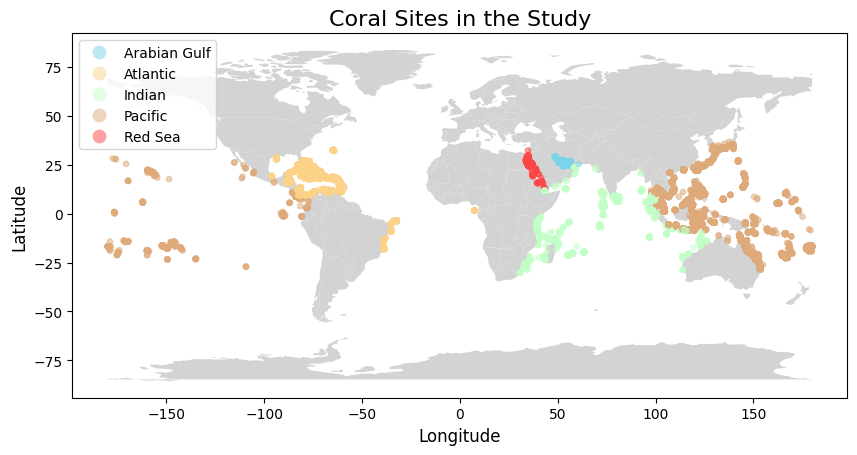

In [46]:
# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(samples['Longitude_Degrees'], samples['Latitude_Degrees'])]
geo_df = gpd.GeoDataFrame(samples, geometry=geometry)

# Load a base map
world = gpd.read_file("https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json")

# Colormap
colors = ListedColormap(['#7BD3EA', '#FBD288', '#C2FFC7', '#DEAA79', '#FF4545'])

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
world.plot(ax=ax, color='lightgray')
geo_df.plot(
    ax=ax,
    column='Ocean_Name',  # Color by 'Ocean'
    categorical=True,
    legend=True,  # Add legend
    markersize=15,
    cmap=colors,  # Colormap for categories
    alpha=0.5
)

ax.set_title('Coral Sites in the Study', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

plt.savefig('Plots/coral_sites.png')
plt.show()

## Temporal Study of Indian Oceal Corals